In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_csv("/Users/karinamehta/Desktop/DSD3/Airline_Reviews.csv")
df = df.dropna()


In [2]:
def remove_ordinal_suffix(date_str):
    return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)
df['Cleaned Date'] = df['Review Date'].apply(remove_ordinal_suffix)

df['Cleaned Date'] = pd.to_datetime(df['Cleaned Date'], format='%d %B %Y')
df.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,...,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,Cleaned Date
5,5,Adria Airways,1,"""Had very bad experience""",17th September 2019,True,Had very bad experience with rerouted and ca...,CR 900,Couple Leisure,Economy Class,...,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,2019-09-17
7,7,Adria Airways,1,"""book another company""",24th August 2019,False,"First of all, I am not complaining about a s...",Bombardier CRJ,Solo Leisure,Economy Class,...,August 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,2019-08-24
22,22,Adria Airways,8,"""seat was quite comfortable """,27th January 2017,False,Ljubljana to Vienna. After a fast boarding p...,Canadair 700,Solo Leisure,Business Class,...,December 2016,5.0,5.0,4.0,5.0,5.0,5.0,4.0,yes,2017-01-27
29,29,Adria Airways,6,"""staff were all pleasant enough""",4th September 2016,False,Booked this flight after many years using Easy...,A319,Family Leisure,Economy Class,...,September 2016,2.0,4.0,3.0,3.0,4.0,4.0,4.0,yes,2016-09-04
113,113,Aegean Airlines,1,"""Please keep up the excellent work""",26th April 2023,True,Aegean Airlines will remain always my first ...,A321 Neo,Solo Leisure,Economy Class,...,April 2023,5.0,5.0,5.0,5.0,3.0,4.0,5.0,yes,2023-04-26


In [3]:
df.loc[:,'avgSeat Comfort'] = df['Seat Comfort'].mean()
df.loc[:,'avgCabin Staff Service'] = df['Cabin Staff Service'].mean()
df.loc[:,'avgFood & Beverages'] = df['Food & Beverages'].mean()
df.loc[:,'avgGround Service'] = df['Ground Service'].mean()
df.loc[:,'avgInflight Entertainment'] = df['Inflight Entertainment'].mean()
df.loc[:,'avgWifi & Connectivity'] = df['Wifi & Connectivity'].mean()
df.loc[:,'avgValue For Money'] = df['Value For Money'].mean()


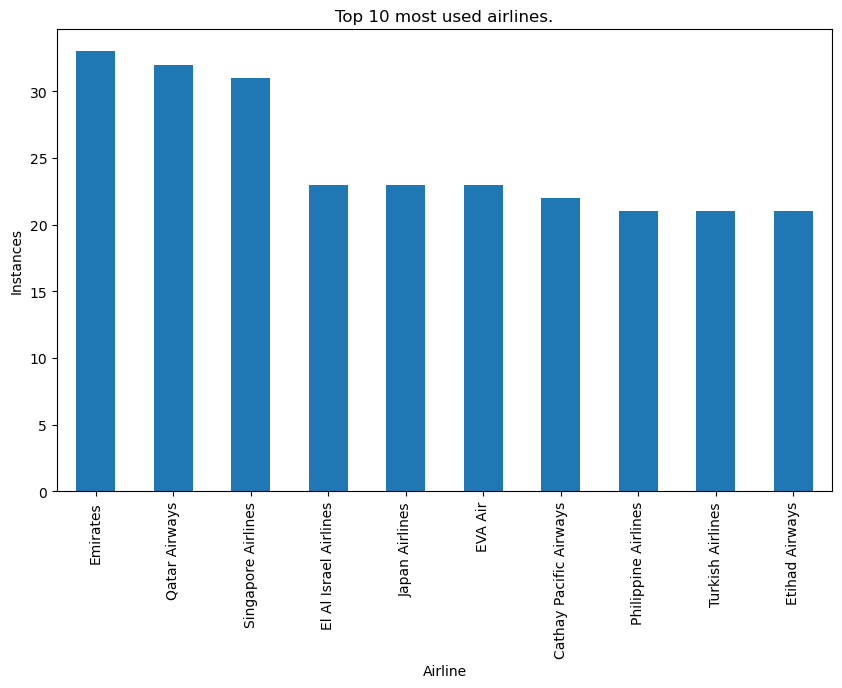

In [4]:
airline_counts = df['Airline Name'].value_counts()
top10 = airline_counts[range(10)]
plt.figure(figsize=(10, 6))
top10.plot(kind='bar')
plt.xlabel("Airline")
plt.ylabel("Instances")
plt.title("Top 10 most used airlines.")

plt.show()

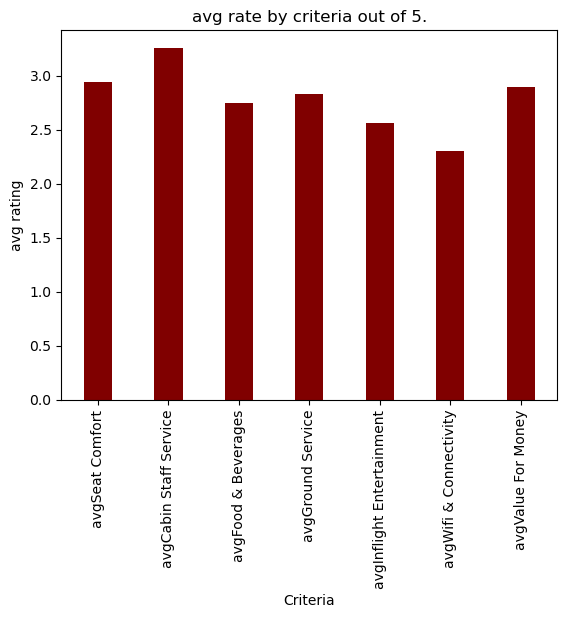

In [5]:
data = {'avgSeat Comfort':2.943611, 'avgCabin Staff Service':3.258548, 'avgFood & Beverages':2.74865, 
        'avgGround Service':2.834433, 'avgInflight Entertainment':2.560888, 'avgWifi & Connectivity':2.29994, 'avgValue For Money':2.895021 }
criteria = list(data.keys())
values = list(data.values())

plt.bar(criteria, values, color ='maroon', 
        width = 0.4)

plt.xlabel("Criteria")
plt.ylabel("avg rating")
plt.title("avg rate by criteria out of 5.")
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'rating.')

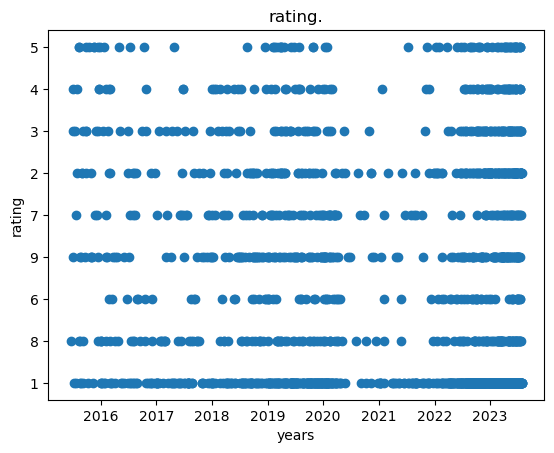

In [7]:
date = df['Cleaned Date'].reset_index()['Cleaned Date']
rating = df['Overall_Rating'].reset_index()['Overall_Rating']
plt.scatter(date, rating)
plt.xlabel("years")
plt.ylabel("rating")
plt.title("rating.")

# Cleaning the data for top 50 airlines

In [12]:
airline_counts = df['Airline Name'].value_counts()
top50 = airline_counts[range(50)]
top50df = df[df['Airline Name'].isin(top50.index)]
columns = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity','Value For Money' ]
mean50 = top50df.groupby('Airline Name')[columns].mean()
mean50.index.name = "Airline"
mean50.columns = mean50.columns.str.replace(' ', '_')
mean50.index = mean50.index.str.replace(' ', '_')
mean50.columns = mean50.columns.str.replace('&', '_')

In [ ]:
mean50.to_csv('to50mean.csv')